In [2]:
library ("igraph")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
l = c(0.003, 0.004, 0.01, 0.05, 0.1)

In [4]:
nodeNum = 1000

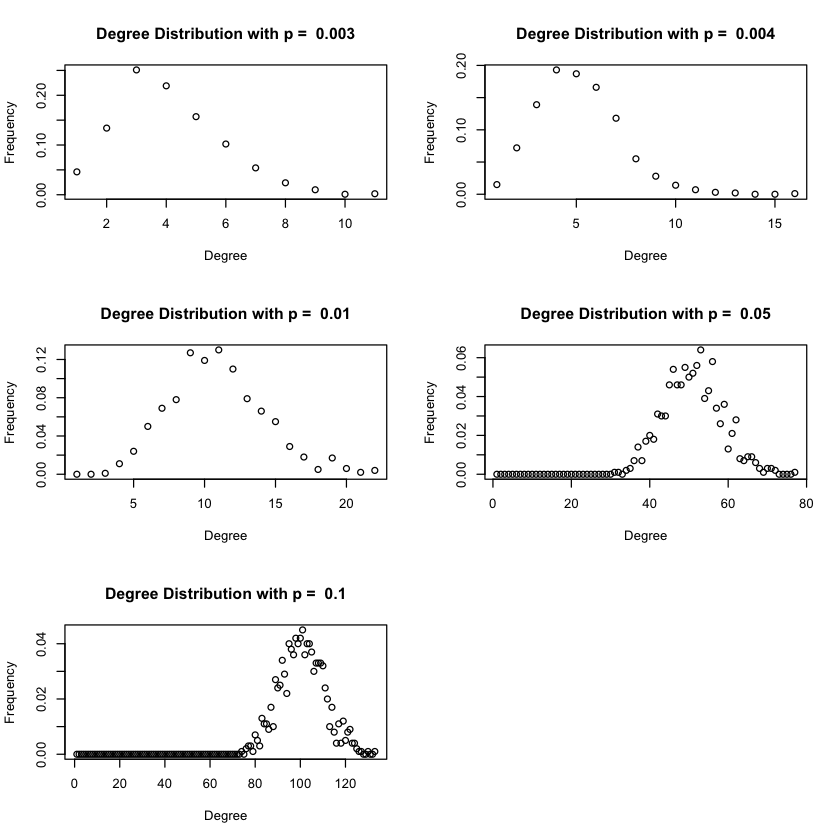

In [5]:
n = length(l)
layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow = TRUE))
means1 = list(1:n);
vars1 = list(1:n);
for(i in 1:n){
    g <- erdos.renyi.game(nodeNum, l[i], directed=F)
    title = paste( "Degree Distribution with p = ",l[i])
    #print(vcount(g))
    #print(ecount(g))
    #if(p == 0.01)print(degree.distribution(g))
    degreesVector <- degree(g)
    #print(degreesVector)
    means1[i] = mean(degreesVector)
    vars1[i] = var(degreesVector)
    plot(degree.distribution(g),main=title,xlab="Degree",ylab="Frequency")
}

In [6]:
print(vars1)

[[1]]
[1] 3.021998

[[2]]
[1] 4.211748

[[3]]
[1] 10.91896

[[4]]
[1] 51.49148

[[5]]
[1] 93.96427



In [12]:
#theoretical value
means2 = c(1 : length(l))
vars2 = c(1 : length(l))
for(i in 1:length(l)){
    means2[i] = (nodeNum - 1) * l[i]
    vars2[i] = (nodeNum - 1)  * l[i] * l[i]
}
print(means2)
print(vars2)

[1]  2.997  3.996  9.990 49.950 99.900
[1] 0.008991 0.015984 0.099900 2.497500 9.990000


In [19]:
#(b)
#not all random realization of the ER network connected
iter <- 1000
connected = c(0,0,0,0,0)
diameters = c(0,0,0,0,0)
for(i in 1:iter){
    for(j in 1:length(l)){
        g <- erdos.renyi.game(nodeNum, l[j], directed=F)
        connected[j] = connected[j] + is.connected(g)
        if(diameters[j] == 0 && !is.connected(g)){
            g.components <- clusters(g)
            #print(g.components$csize)
            # which is the largest component
            ix <- which.max(g.components$csize)
            # get the subgraph correspondent to just the giant component
            g.giant <- induced.subgraph(g, which(g.components$membership == ix))
            diameters[j] = diameter(g.giant)
        }
        
    }
    
}

In [9]:
connected


[1]    0    0  963 1000 1000

In [10]:
diameters

[1] 18 11  5  0  0

In [15]:
#part(c)
p_upper <- log(nodeNum) / nodeNum

In [66]:

p_list <- seq(0.00001, 5 * p_upper, p_upper / 100)

In [67]:
normalizedGCC = rep(0,length(p_list))
for(i in 1:length(p_list)){
    for(j in 1 : 100){
        g <- erdos.renyi.game(nodeNum, p_list[i], directed=F)
        #print(p_list[j])
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        #print((vcount(g.giant)) / nodeNum)
        normalizedGCC[i] = normalizedGCC[i] + (vcount(g.giant)) / nodeNum
    }
    normalizedGCC[i] = normalizedGCC[i] / 100.0
}

In [68]:
normalizedGCC

[1] 0.00210 0.00316 0.00411 0.00519 0.00597 0.00791 0.00965 0.01092 0.01403
 [10] 0.01774 0.02200 0.03032 0.03724 0.05674 0.08817 0.12089 0.19692 0.26891
 [19] 0.35424 0.42960 0.51007 0.55430 0.60346 0.63580 0.67426 0.70701 0.73004
 [28] 0.75871 0.78015 0.79898 0.81573 0.83388 0.84511 0.85787 0.87199 0.88461
 [37] 0.89188 0.90305 0.90776 0.91461 0.92348 0.92902 0.93439 0.93942 0.94461
 [46] 0.94781 0.95207 0.95735 0.95953 0.96199 0.96435 0.96746 0.96892 0.97129
 [55] 0.97424 0.97632 0.97802 0.97923 0.98043 0.98158 0.98384 0.98492 0.98591
 [64] 0.98679 0.98764 0.98854 0.98862 0.98940 0.99082 0.99146 0.99223 0.99173
 [73] 0.99275 0.99370 0.99376 0.99436 0.99465 0.99505 0.99540 0.99579 0.99595
 [82] 0.99619 0.99644 0.99665 0.99701 0.99745 0.99727 0.99756 0.99753 0.99772
 [91] 0.99808 0.99820 0.99825 0.99838 0.99872 0.99863 0.99867 0.99873 0.99888
[100] 0.99912 0.99906 0.99887 0.99927 0.99923 0.99939 0.99930 0.99938 0.99936
[109] 0.99948 0.99933 0.99953 0.99958 0.99958 0.99962 0.99955 0.99964 0.99967
[118] 0.99961 0.99963 0.99973 0.99970 0.99980 0.99982 0.99985 0.99985 0.99982
[127] 0.99989 0.99989 0.99985 0.99987 0.99987 0.99993 0.99984 0.99992 0.99992
[136] 0.99989 0.99991 0.99991 0.99994 0.99988 0.99991 0.99993 0.99996 0.99993
[145] 0.99994 0.99996 0.99997 0.99996 0.99996 0.99997 0.99999 0.99999 0.99997
[154] 1.00000 0.99999 0.99996 0.99998 0.99998 0.99998 1.00000 0.99998 0.99999
[163] 0.99998 0.99999 0.99999 0.99999 1.00000 1.00000 0.99999 1.00000 1.00000
[172] 1.00000 0.99999 0.99999 1.00000 1.00000 1.00000 1.00000 1.00000 0.99999
[181] 0.99999 1.00000 0.99998 1.00000 1.00000 1.00000 0.99998 1.00000 1.00000
[190] 0.99999 1.00000 1.00000 1.00000 0.99998 1.00000 0.99999 1.00000 1.00000
[199] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 0.99999 0.99999 1.00000
[208] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[217] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[226] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[235] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[244] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[253] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[262] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[271] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[280] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[289] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[298] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[307] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[316] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[325] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[334] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[343] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[352] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[361] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[370] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[379] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[388] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[397] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[406] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[415] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[424] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[433] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[442] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[451] 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
[460] 1.00000 1.00000 1.

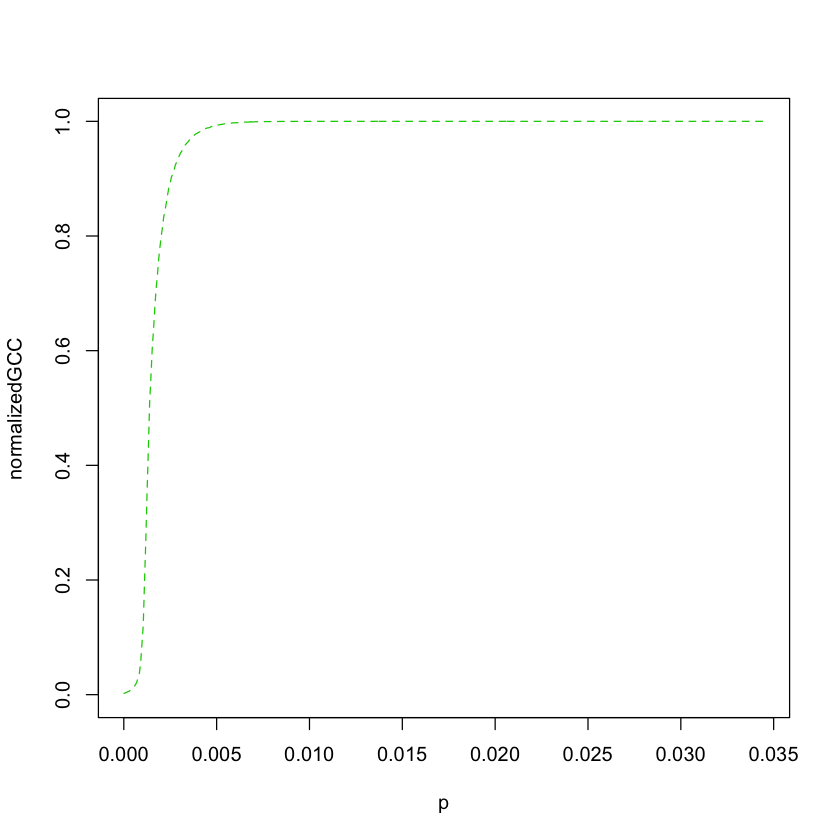

In [69]:
p = p_list
plot(p, normalizedGCC, type = "l", ylim = c(0, 1), col = 3, lty = 2)

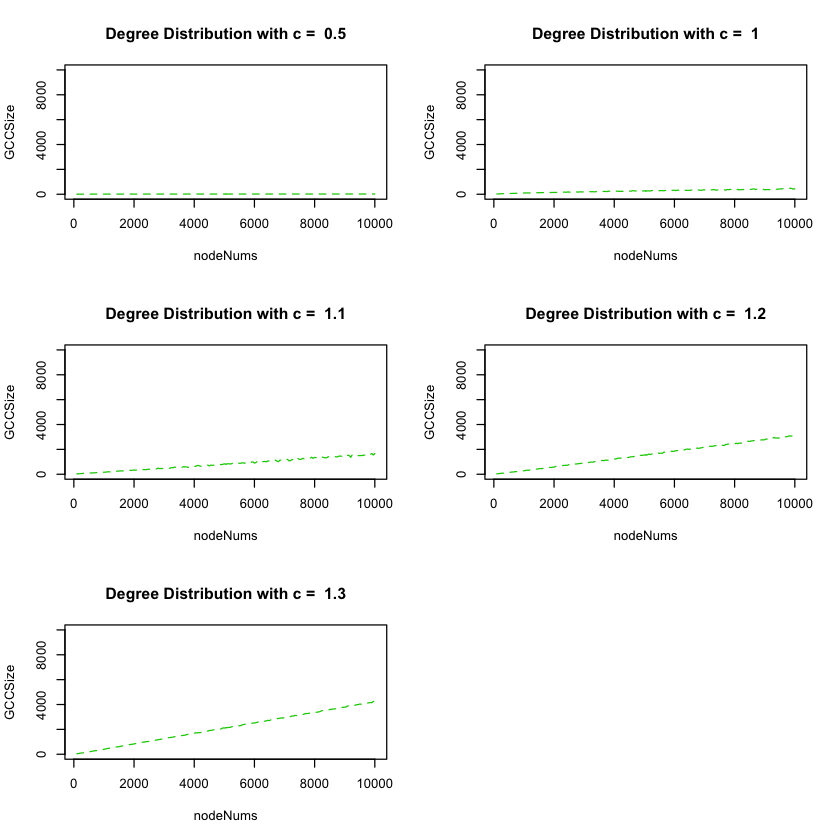

In [3]:
c_list = c(0.5, 1, 1.1, 1.2, 1.3)
layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow = TRUE))
for(c in c_list){
    GCCSize <- rep(0, length(seq(100, 10000, 50)))
    i = 1
    for(n in seq(100, 10000, 50)){
        p = c / n
        for(j in 1:100){
            g <- erdos.renyi.game(n, p, directed=F)
            g.components <- clusters(g)
            ix <- which.max(g.components$csize)
            g.giant <- induced.subgraph(g, which(g.components$membership == ix))
            GCCSize[i] = GCCSize[i] + (vcount(g.giant))
        }
        GCCSize[i] = GCCSize[i] / 100;
        i = i + 1
    }
    #print(GCCSize)
    title = paste( "Degree Distribution with c = ",c)
    nodeNums = seq(100, 10000, 50)
    plot(nodeNums, GCCSize, main=title, type = "l", ylim = c(0, 10000), col = 3, lty = 2)       
}

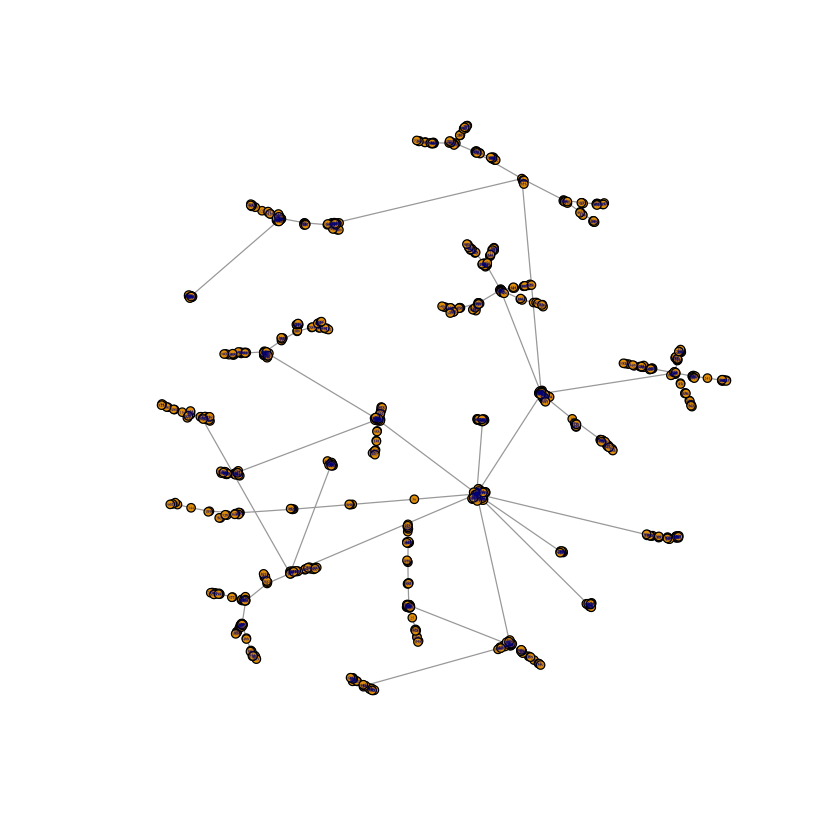

In [4]:
#problem 2
#part (a)
g1 <- barabasi.game(1000, m = 1 ,directed=F)
plot(g1,vertex.size=3, vertex.label.cex=0.2)
#this netowrks are always connected

In [5]:
fg <- fastgreedy.community(g1)
cmsize <- sizes(fg)
print(cmsize)
print(modularity(fg))

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 41 39 41 45 55 36 35 34 34 36 31 36 33 31 31 30 28 32 28 33 27 25 26 21 20 
27 28 29 30 31 32 33 34 
20 19 19 18 18 16 10  9 
[1] 0.933726


In [6]:
g2 <- barabasi.game(10000, m = 1 ,directed=F)
fg2 <- fastgreedy.community(g2)
print(modularity(fg2))

[1] 0.9784832


In [7]:
#layout(matrix(c(1,2), 1, 2, byrow = TRUE))
#plot(degree.distribution(g),main=title,xlab="Degree",ylab="Frequency")
#degree.distribution(g1)
#degree.distribution(g2)
install.packages("poweRlaw")


The downloaded binary packages are in
	/var/folders/ct/l4jp_f0d1cndh0kdh86h1drc0000gn/T//Rtmp2S8F4A/downloaded_packages


   [1] 32 13 17 18 11  4 10  4  8 14  9  3  6  6  9  8  3  3  5  4 12  5  2  9
  [25]  2  3  3 20  3  4  7 11  4  2  3  2  1  2  2  1 12  3  8  2  8  3 12  1
  [49]  6  2  5  7  1  3  3  4  4  2  1  3  4  6  4  2  4  5  2  3  3  1  6  2
  [73]  2  3  3  6  5  4  2  4  2  4  2  5  2  1  7  1  1  4  3  9  1  9  1  1
  [97]  4  2  1  5 11  7  3  1  3  1  1  3  4  7  3  2  1  9  4  2  1  5  1  3
 [121]  2  2  4  3  2  4  2  3  5  2  1  6  1  2  2  8  5  2  1  1  1  5  4  3
 [145]  5  1  1  1  1  3  5  1  1  1  1  2  5  3  3  4  1  6  4 10  1  4  4  1
 [169]  3  1  4  5  3  3  1  1  3  3  4  1  3  7  2  3  1  1  4  2  3  3  1  4
 [193]  3  1  1  4  2  1  2  3  4  2  1  2  7  2  3  3  1  5  1  3  1  1  3  1
 [217]  1  1  1  2  2  1  6  3  1  5  1  3  2  1  8  1  3  1  2  3  2  1  1  4
 [241]  2  7  1  1  2  1  3  1  2  5  1  3  3  3  2  4  1  3  5  2  1  2  1  3
 [265]  1  3  2  1  4  3  1  2  1  1  7  3  2  3  3  3  1  2  4  4  3  3  3  1
 [289]  1  3  2  2  2  5  2  5  1  2  1  1  4  1  3 

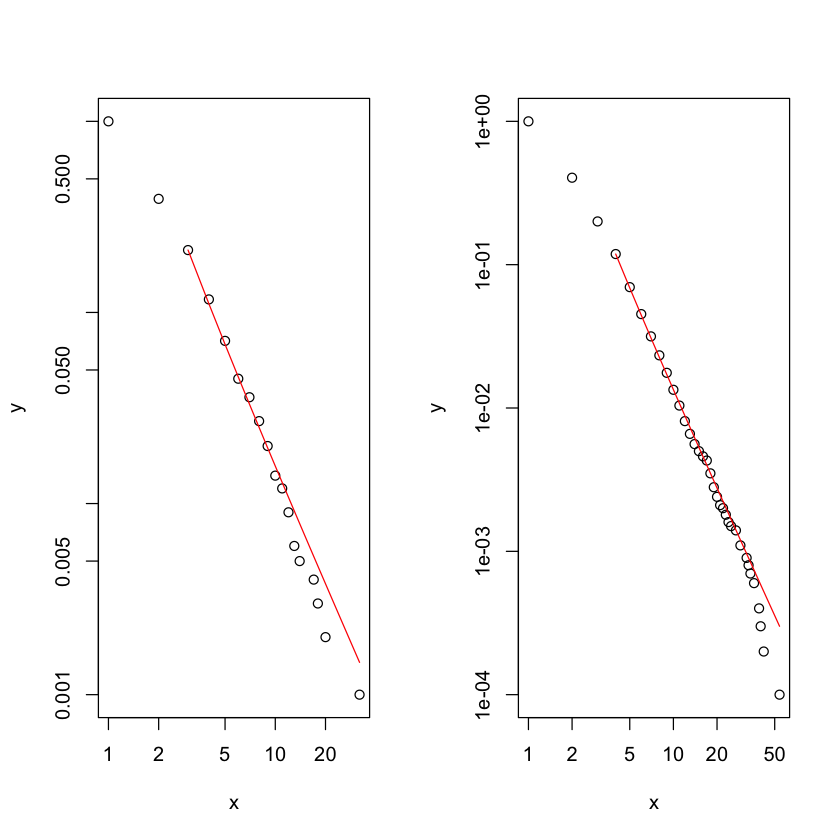

In [86]:
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
#for(g in c(g1,g2))
degreesVector1 <- degree(g1)
degreesVector2 <- degree(g2)
library(poweRlaw)
mm1 = displ$new(degreesVector1)
est1 = estimate_xmin(mm1)
mm1$setXmin(est1[[2]])
mm1$setPars(est1[[3]])
plot(mm1)
lines(mm1,col=2)
mm2 = displ$new(degreesVector2)
est2 = estimate_xmin(mm2)
mm2$setXmin(est2[[2]])
mm2$setPars(est2[[3]])
plot(mm2)
lines(mm2,col=2)

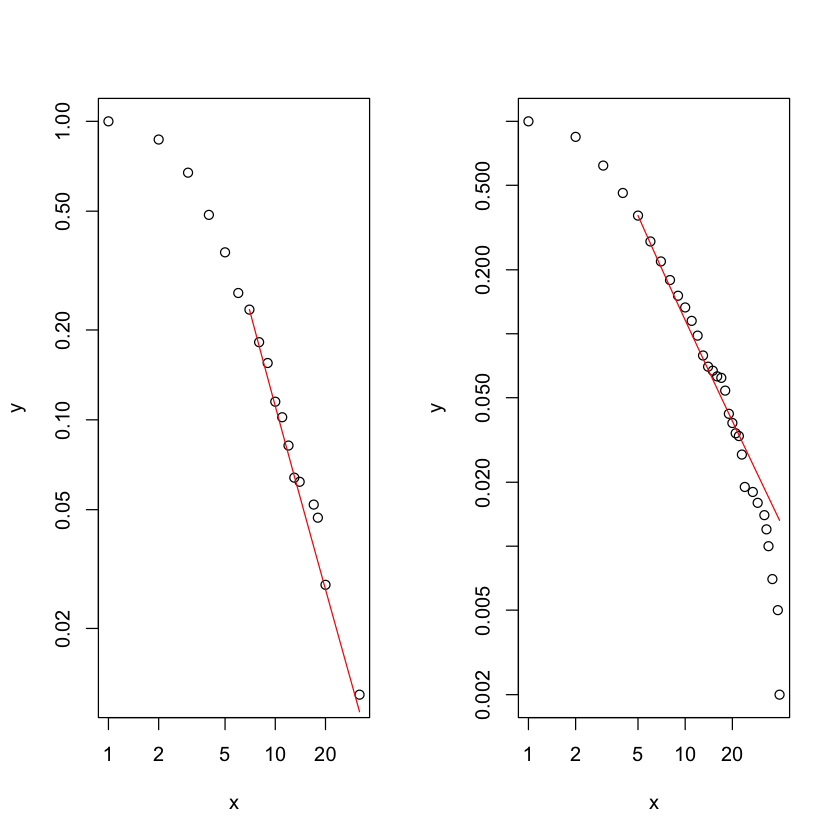

In [109]:
pickNum = 1000
degree_list1 = rep(0,pickNum)
degree_list2 = rep(0,pickNum)
for(i in 1:pickNum){
    node_i = sample(vcount(g1), 1)
    neighbor_i = neighbors(g1, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list1[i] = degree(g1, node_j)
}
for(k in 1:pickNum){
    node_i = sample(vcount(g2), 1)
    #print(node_i)
    neighbor_i = neighbors(g2, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list2[k] = degree(g2, node_j)
}
#print(degree_list2)
title1 = "graph with node 1000"
title2 = "graph with node 10000"
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
library(poweRlaw)
mm1 = displ$new(degree_list1)
est1 = estimate_xmin(mm1)
mm1$setXmin(est1[[2]])
mm1$setPars(est1[[3]])
plot(mm1)
lines(mm1,col=2)
mm2 = displ$new(degree_list2)
est2 = estimate_xmin(mm2)
mm2$setXmin(est2[[2]])
mm2$setPars(est2[[3]])
plot(mm2)
lines(mm2,col=2)

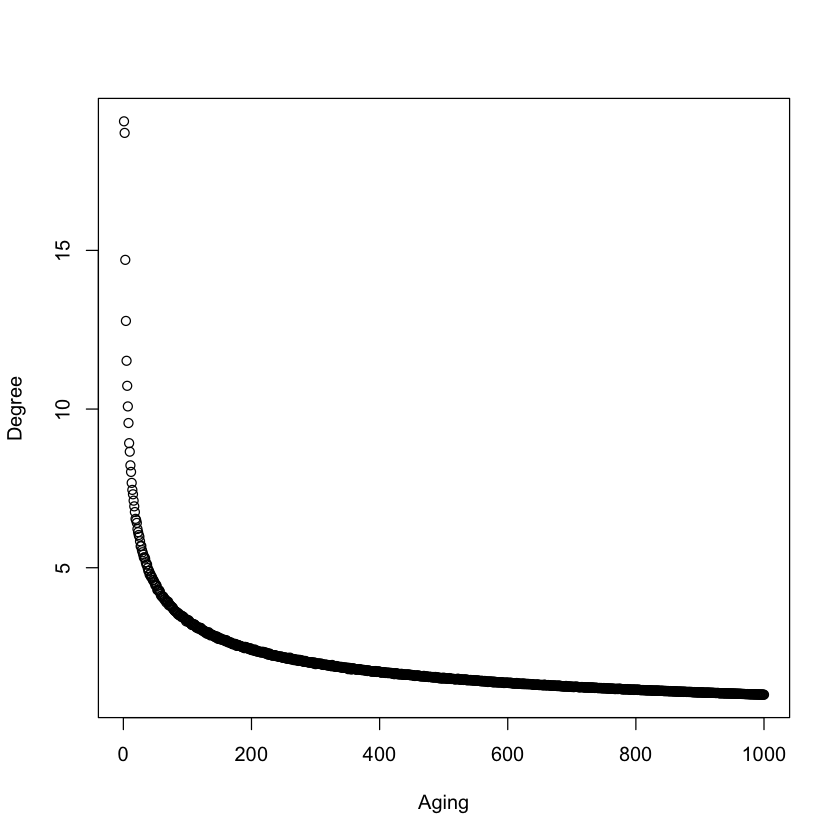

In [125]:
num_exp = 10000
degree_list = rep(0, 1000)
for(i in 1 : num_exp){
    gg <- barabasi.game(1000, m = 1 ,directed=F)
    degree_list = degree_list + degree(gg)
}
degree_list = degree_list / num_exp
plot(degree_list,xlab="Aging",ylab="Degree")

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
59 45 44 48 53 52 39 37 34 36 34 32 37 29 31 34 32 25 25 33 25 24 21 20 20 17 
27 28 29 30 31 32 33 34 
17 17 19 14 13 12 11 11 
[1] 0.9315722
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 12  15 210  44  16  51  63   9  10   7   6  14  15   7   7  11   5   5   7   6 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  7   6   8   9   7   8   7   7   6   7   6   5   5   5   5   5   4   4   4   4 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  4   4   4   4   4   4   3   3   3   3   3   4   3   3   3   3   3   3   3   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   3   3   5   3   3   4   3   3   4   3   3   4   5   3   3   4   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3  

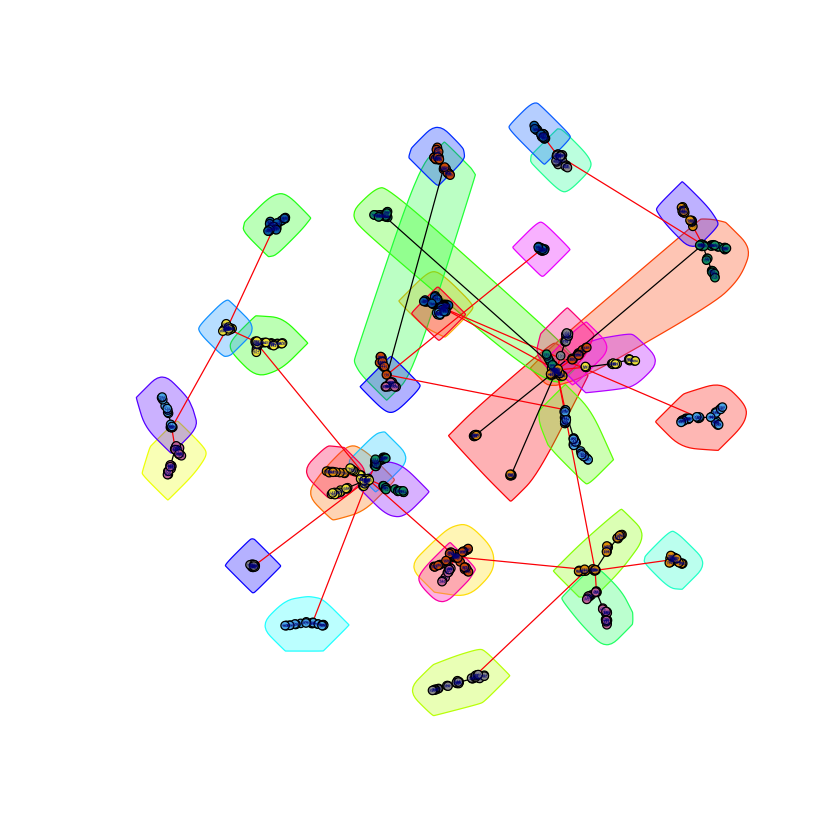

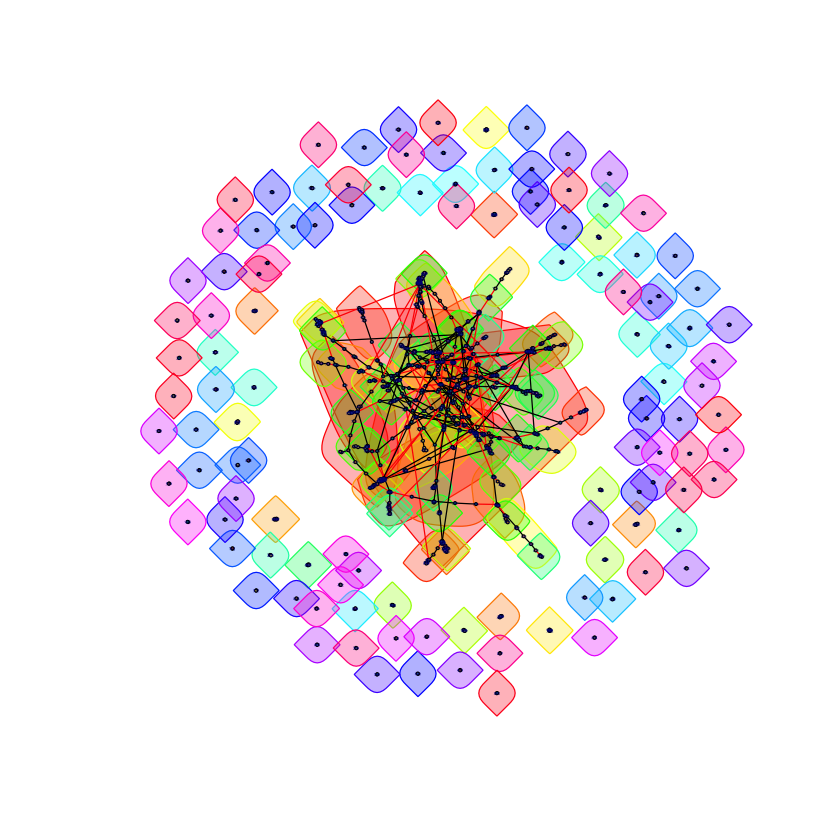

In [140]:
g3 = barabasi.game(1000, m = 1 ,directed=F)
degree_seq = degree(g3)

#print(degree_seq)
fg3 <- fastgreedy.community(g3)
cmsize3 <- sizes(fg3)
print(cmsize3)
print(modularity(fg3))
plot(fg3,g3,vertex.size=3, vertex.label.cex=0.2)

fg4 <- walktrap.community(g4)
cmsize4 <- sizes(fg4)
print(cmsize4)
print(modularity(fg4))
plot(fg4,g4,vertex.size=1, vertex.label.cex=0.2)

In [128]:
degree_seq

[1] 26  9  5 16  9 12  4 28 23 16  7 12  7  7  1 16  9  6  3  7 13  5  2  8
  [25] 21 15  2  9 10  2  1  8  3  3  2 13  3  3  3  3  6  7  2  4  5  2  6  1
  [49]  2  2  6  5  1  2  1  2  2  2  1  1  3  2 10  2  9  3  4  2  5  1  4  8
  [73]  3  9  4  3  4  2  1  4  6  1  1  1  7  2  2  5  7  7  3  4  4  5  6  5
  [97]  2  7  2  4  4  4  2  4  2  2  2  2  3  4  6  1  4  4  2  5  1  2  1  7
 [121]  7  2  4  4  2  4  1  5  8  2  1  3  2  3  2  3  5  2  4  1  1  4  1  6
 [145]  2  2  1  1  3  6  1  4  2  4  9  3  1  1  1  2  2  4  3  1  1  2  1  3
 [169]  4  2  4  2  1  5  1  2  2  3  1  3  2  4  3  1  5  1  2  2  2  4  2  2
 [193]  3  2  4  3  1  3  4  1  4  4  1  2  4  1  6  2  1  2  1  2  1  2  3  1
 [217]  2  2  1  1  2  2  1  1  1  1  2  6  1  2  1  2  3  2  4  1  3  1  3  2
 [241]  1  1  1  1  2  1  1  2  2  3  2  4  1  1  3  4  1  2  3  1  3  1  1  1
 [265]  2  3  1  1  3  1  1  1  2  2  3  1  1  1  3  2  3  2  1  2  2  1  1  1
 [289]  1  1  2  1  1  2  1  3  3  3  3  3  2  1  2  5  3  1  2  1  1  3  1  1
 [313]  2  1  2  2  2  1  4  1  1  1  3  1  1  1  1  2  2  1  5  1  1  1  2  1
 [337]  1  1  2  1  1  1  2  1  4  2  3  1  3  1  1  1  1  1  1  1  3  2  1  1
 [361]  2  1  1  1  1  2  1  2  1  2  2  2  2  1  1  1  1  1  1  1  4  1  1  1
 [385]  1  2  2  1  1  1  1  1  5  1  1  1  1  2  1  2  1  1  1  2  1  4  6  1
 [409]  1  2  2  4  3  2  1  1  2  1  1  4  2  2  1  1  1  1  1  2  1  1  2  3
 [433]  1  2  1  1  2  1  1  4  1  2  1  2  1  1  1  2  2  2  3  2  2  1  3  2
 [457]  2  3  2  3  1  1  1  1  1  2  1  1  2  1  1  3  2  2  1  4  1  1  1  1
 [481]  1  1  2  1  1  1  1  1  1  2  1  2  1  1  1  1  3  1  1  4  2  4  1  3
 [505]  2  2  1  1  2  1  1  2  6  2  1  2  1  1  1  2  2  6  2  2  3  2  2  3
 [529]  2  1  1  1  2  1  1  2  2  1  1  1  2  1  1  1  2  1  1  1  1  2  1  1
 [553]  2  1  4  1  1  1  1  3  1  1  1  1  1  1  1  2  1  1  1  2  2  1  1  1
 [577]  1  1  1  3  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  1  1  1  4  2
 [601]  1  1  2  2  1  1  1  1  1  1  3  2  1  2  2  1  1  1  1  2  1  1  2  1
 [625]  1  1  2  1  1  2  1  2  1  2  1  1  2  1  1  3  1  1  3  1  1  1  1  1
 [649]  1  5  1  1  1  1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
 [673]  1  1  2  1  2  3  2  1  1  1  1  1  1  1  3  2  1  1  1  1  1  1  1  2
 [697]  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  2  1  1  1  1  1  1  1
 [721]  1  1  1  1  2  3  3  2  1  1  1  1  1  1  1  1  2  2  1  1  1  1  1  1
 [745]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1
 [769]  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  1  1  2  1  1  2  1  1
 [793]  1  6  1  1  1  1  1  1  1  1  1  1  1  1  3  1  2  1  2  1  1  1  3  1
 [817]  1  1  1  2  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1
 [841]  1  1  1  1  1  2  1  2  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [865]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [889]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1
 [913]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [937]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  2  1  1
 [961]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [985]  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1